# Selecting the Best Feature Set

- We are going to use the base/default RF model without optimization
- Apply all the featuresets that were created during the analysis
- Based on the Accuracy & Performance, we will select the best Featureset
- The best Featureset will then be taken through variouse optimization setps to improve on the results

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
import joblib

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

**reading all the feature sets**

In [2]:
# base feature set
df_base = pd.read_csv('input/feature_sets/base.csv')

# base feature set with advanced features
df_base_adv = pd.read_csv('input/feature_sets/base_adv.csv')

# base feature set with dimensionality reduction
df_base_filtered = pd.read_csv('input/feature_sets/base_filtered.csv')

# base feature set with advance features and dimensionality reduction
df_base_adv_filtered = pd.read_csv('input/feature_sets/base_adv_filtered.csv')

# base feature set with mean features
df_base_mean = pd.read_csv('input/feature_sets/base_mean.csv')

# base feature set with advanced and mean encoded features
df_base_adv_mean = pd.read_csv('input/feature_sets/base_adv_mean.csv')

## 1. Base Feature Set

In [3]:
X = df_base.drop(['status_group','id'], axis=1)
y = df_base['status_group'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=42)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40986 entries, 12010 to 56422
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   district_code            40986 non-null  int64  
 1   basin                    40986 non-null  int64  
 2   region                   40986 non-null  int64  
 3   region_code              40986 non-null  int64  
 4   public_meeting_label     40986 non-null  int64  
 5   scheme_management_label  40986 non-null  int64  
 6   permit_label             40986 non-null  int64  
 7   extraction_type_group    40986 non-null  int64  
 8   extraction_type_class    40986 non-null  int64  
 9   extraction_type          40986 non-null  int64  
 10  management               40986 non-null  int64  
 11  management_group         40986 non-null  int64  
 12  payment                  40986 non-null  int64  
 13  payment_type             40986 non-null  int64  
 14  water_quality     

**apply base model on RF**

In [5]:
# get the rf object
rf_base = RandomForestClassifier(n_estimators=101, n_jobs=-1)

# fit the data
rf_clf = rf_base.fit(X_train,y_train)

# prediction
rf_clf_pred = rf_base.predict(X_test)

**confusion matrix**

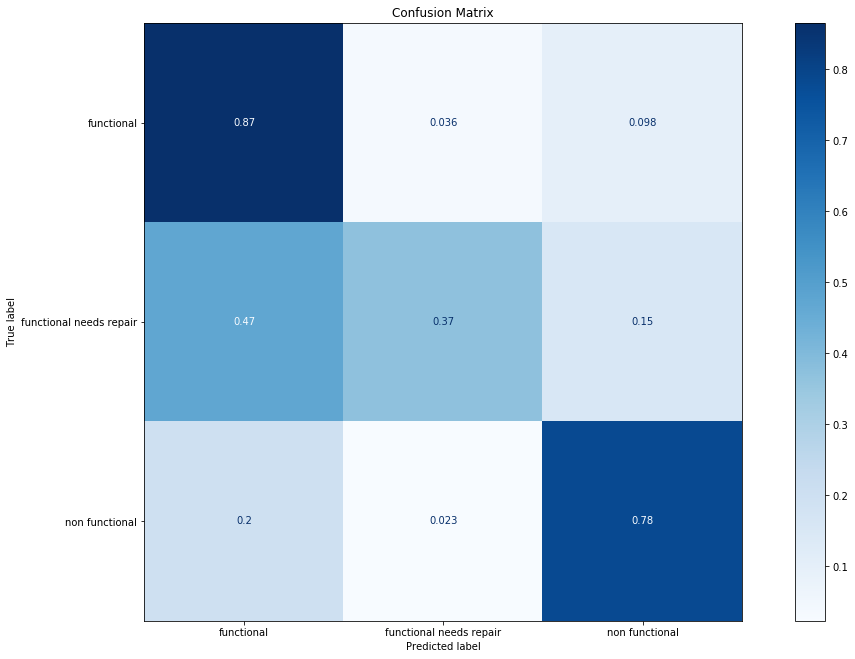

In [6]:
# Generate confusion matrix
fig, axes = plt.subplots(figsize=(19,11))

matrix = plot_confusion_matrix(rf_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',ax= axes)

plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

**classification report**

In [7]:
print(classification_report(y_test, rf_clf_pred))

                         precision    recall  f1-score   support

             functional       0.81      0.87      0.84     10052
functional needs repair       0.48      0.37      0.42      1332
         non functional       0.82      0.78      0.80      7030

               accuracy                           0.80     18414
              macro avg       0.71      0.67      0.69     18414
           weighted avg       0.79      0.80      0.79     18414



## 2. Base Feature Set + Advanced Features

In [12]:
# reading the values
X = df_base_adv.drop(['status_group','id'], axis=1)
y = df_base_adv['status_group'].values

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=42)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40986 entries, 12010 to 56422
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region_perf              40986 non-null  int64  
 1   source_type_perf         40986 non-null  int64  
 2   amount_tsh_zero          40986 non-null  int64  
 3   gps_gt_668               40986 non-null  int64  
 4   cons_year_zero           40986 non-null  int64  
 5   pump_age_group           40986 non-null  int64  
 6   all_zeros                40986 non-null  int64  
 7   district_code            40986 non-null  int64  
 8   basin                    40986 non-null  int64  
 9   region                   40986 non-null  int64  
 10  region_code              40986 non-null  int64  
 11  public_meeting_label     40986 non-null  int64  
 12  scheme_management_label  40986 non-null  int64  
 13  permit_label             40986 non-null  int64  
 14  extraction_type_gr

In [9]:
# fit the same base model
rf_clf = rf_base.fit(X_train, y_train)

# prediction
rf_clf_pred = rf_base.predict(X_test)

**confusion matrix**

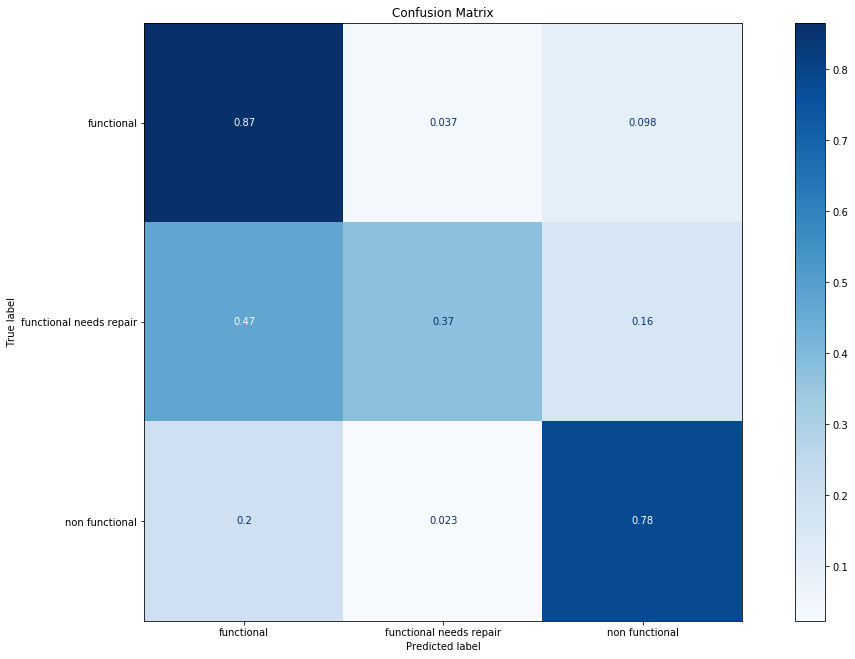

In [10]:
# Generate confusion matrix
fig, axes = plt.subplots(figsize=(19,11))

matrix = plot_confusion_matrix(rf_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',ax= axes)

plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

**classification report**

In [11]:
print(classification_report(y_test, rf_clf_pred))

                         precision    recall  f1-score   support

             functional       0.81      0.87      0.84     10052
functional needs repair       0.48      0.37      0.42      1332
         non functional       0.82      0.78      0.80      7030

               accuracy                           0.80     18414
              macro avg       0.71      0.67      0.69     18414
           weighted avg       0.79      0.80      0.79     18414



## 3. Base Feature Set + Advanced Features + Filtered Attributes

Filtered attributes are the ones that were not required based on some analysis

In [14]:
X = df_base_adv_filtered.drop(['status_group','id','installer','scheme_name','quantity_group'], axis=1)
y = df_base_adv_filtered['status_group'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39798 entries, 107 to 56422
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gps_height               39798 non-null  int64  
 1   longitude                39798 non-null  float64
 2   latitude                 39798 non-null  float64
 3   basin                    39798 non-null  int64  
 4   region_code              39798 non-null  int64  
 5   district_code            39798 non-null  int64  
 6   lga                      39798 non-null  int64  
 7   construction_year        39798 non-null  int64  
 8   extraction_type          39798 non-null  int64  
 9   extraction_type_group    39798 non-null  int64  
 10  management               39798 non-null  int64  
 11  payment                  39798 non-null  int64  
 12  water_quality            39798 non-null  int64  
 13  quantity                 39798 non-null  int64  
 14  source              

In [16]:
# fit the same base model
rf_clf = rf_base.fit(X_train, y_train)

# prediction
rf_clf_pred = rf_base.predict(X_test)

**confusion matrix**

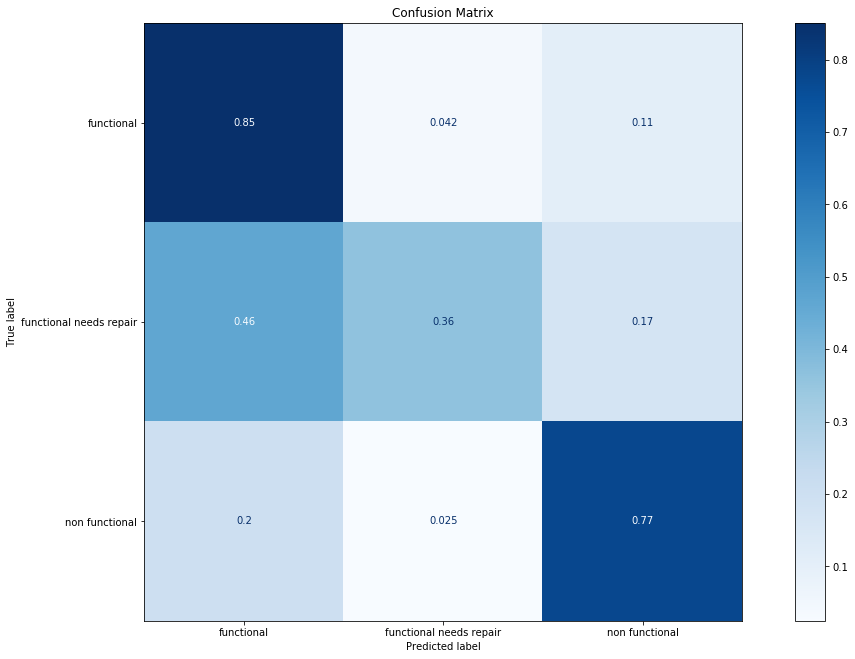

In [17]:
# Generate confusion matrix
fig, axes = plt.subplots(figsize=(19,11))

matrix = plot_confusion_matrix(rf_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',ax= axes)

plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

**classification report**

In [18]:
print(classification_report(y_test, rf_clf_pred))

                         precision    recall  f1-score   support

             functional       0.81      0.85      0.83     10719
functional needs repair       0.45      0.36      0.40      1425
         non functional       0.81      0.77      0.79      7458

               accuracy                           0.79     19602
              macro avg       0.69      0.66      0.67     19602
           weighted avg       0.78      0.79      0.78     19602



## 4. Base Feature Set + Advanced Features + Mean Attributes

Attributes that were generated through the mean encoding were added in this feature set

In [21]:
X = df_base_adv_mean.drop(['status_group','id','functional needs repair','non functional'], axis=1)
y = df_base_adv_mean['status_group'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=42)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40986 entries, 12010 to 56422
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   region_perf                      40986 non-null  int64  
 1   source_type_perf                 40986 non-null  int64  
 2   amount_tsh_zero                  40986 non-null  int64  
 3   gps_gt_668                       40986 non-null  int64  
 4   cons_year_zero                   40986 non-null  int64  
 5   pump_age_group                   40986 non-null  int64  
 6   all_zeros                        40986 non-null  int64  
 7   district_code                    40986 non-null  int64  
 8   basin                            40986 non-null  int64  
 9   region                           40986 non-null  int64  
 10  region_code                      40986 non-null  int64  
 11  public_meeting_label             40986 non-null  int64  
 12  scheme_managem

In [23]:
# fit the same base model
rf_clf = rf_base.fit(X_train, y_train)

# prediction
rf_clf_pred = rf_base.predict(X_test)

**confusion matrix**

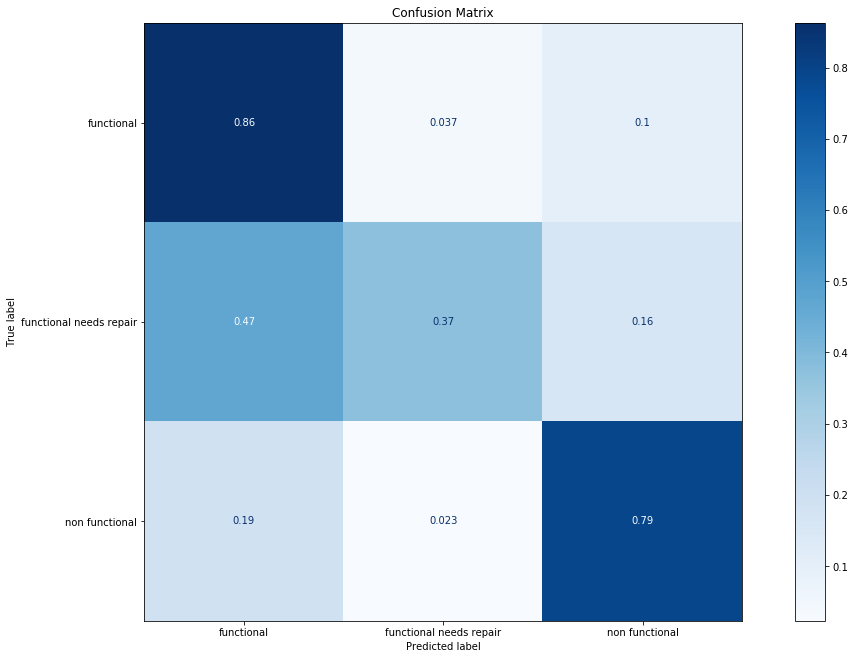

In [24]:
# Generate confusion matrix
fig, axes = plt.subplots(figsize=(19,11))

matrix = plot_confusion_matrix(rf_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',ax= axes)

plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

**classification report**

In [25]:
print(classification_report(y_test, rf_clf_pred))

                         precision    recall  f1-score   support

             functional       0.82      0.86      0.84     10052
functional needs repair       0.48      0.37      0.42      1332
         non functional       0.82      0.79      0.80      7030

               accuracy                           0.80     18414
              macro avg       0.71      0.67      0.69     18414
           weighted avg       0.79      0.80      0.80     18414



# Result

- What can be seen here is that the last feature set, that is composed of base, advance & mean encoded features is bringing slight improvement in the F1 score that that is the balance between precision and recall. 
- I believe, for now, we should concentrate on the optimization for this featureset with different optimization schemes.